In [1]:
import sys
import os


os.chdir("/Users/gabi1/git/Project")

os.getcwd()

'c:\\Users\\gabi1\\git\\Project'

In [2]:
from CHE4230project_LLGModel.ModelDataProcessor import ModelDataProcessor

In [3]:
#Data preprocessing 
data_processor = ModelDataProcessor('Data/RawData1.csv')

data, train_validation, train, validation, test = data_processor.apply_dataSplit()

#DR: UMAP
train_umap,validation_umap,test_umap= data_processor.apply_umap(n_components=2)

   Unnamed: 0    XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5  \
0           1  0.271033  3649.739415  4451.320791  9.223142  32.392900   
1           2  0.270826  3653.341885  4488.640140  9.211980  32.501953   
2           3  0.270474  3688.113265  4432.832766  9.235690  32.402838   
3           4  0.272127  3651.680041  4459.268940  9.192009  31.876790   
4           5  0.270939  3636.329271  4460.409756  9.277992  32.424754   

      XMEAS6       XMEAS7     XMEAS8      XMEAS9  ...       XMV1       XMV2  \
0  47.559754  2798.975799  64.995825  122.898796  ...  62.806984  53.286709   
1  47.374855  2800.296214  65.091251  122.877519  ...  62.819324  53.220324   
2  47.817088  2802.647777  64.812363  122.916165  ...  62.836835  53.211797   
3  47.869249  2803.693084  64.205417  122.892493  ...  62.848190  53.186885   
4  47.509322  2804.787223  64.598623  122.890514  ...  62.848341  53.192271   

        XMV3       XMV4       XMV6       XMV7       XMV8      XMV10  \
0  26.662

c:\Users\gabi1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\gabi1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\gabi1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


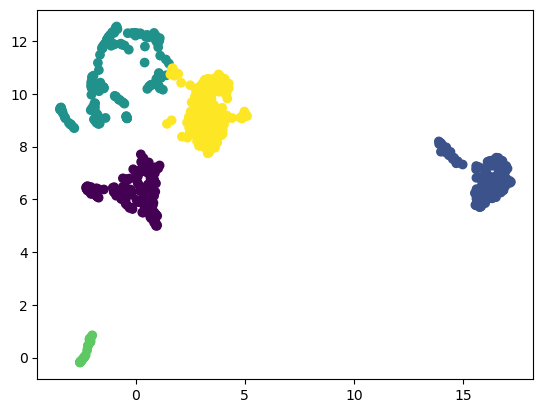

In [5]:
#Cluters: Kmeans
clusters_train,clusters_validation,clusters_test = data_processor.apply_kmeans(num_clusters=5, n_init = 10)

#ploting
plot = data_processor.apply_prot(validation_umap,validation_umap,clusters_validation, cmap='viridis')

In [6]:
#Davies: The minimum score is zero, with lower values indicating better clustering.

from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(train_umap,clusters_train)
db_index

0.4634236327647442

In [7]:
#Silhouette: The best value is 1 and the worst value is -1.

from sklearn.metrics import silhouette_score
score = silhouette_score(train_umap,clusters_train,metric='euclidean')
print(score)

0.6675957
